## Proyek NLP Kelompok 9

## Klasifikasi Emosi pada Komentar Youtube Menggunakan CBOW 

Pengerjaan proyek ini menggunakan data komentar Youtube dan mengidentifikasi komentar tersebut apakah bermakna positif, netral atau negatif.

In [ ]:
# Table of Contents
1. [Introduction](#intro)
2. [Data](#importdata)
3. [Target Variable](#targetvariable)
4. [Feature Selection I: EDA](#featureselection)  
    4.1 [Drop features missing 50% of the data](#missing_data)  
    4.2 [Remove "cheat" data](#cheat_data)  
    4.3 [Inspect the remaining features one by one](#inspect)  
5. [Feature Section II: Statistical Overview](#corr)   
    5.1 [Convert target variable to 0/1 indicator](#converttarget)   
    5.2 [Hypothesis testing on the two distributions of each feature](#kstest)   
    5.3 [Pearson correlation & Heatmap](#pearson)   
6. [Feature Engineering](#featureeng)  
    6.1 [One-Hot Encoding](#dummies)  
    6.2 [Train/Test data split](#split)  
    6.3 [Imputing missing values](#imputing)  
    6.4 [Feature Scaling](#scaling)  
    6.5 [PCA visualization of the train data](#pca)   
    6.6 [Linear dependence of the Charged-Off loans](#pearson2)
7. [Modeling](#modeling)  
    7.1 [Logistic Regression with SGD](#logreg)  
    7.2 [Random Forest](#rf)   
    7.3 [KNN](#knn)  
    7.4 [Model Evaluation with ROC & Confusion Matrix](#evaluate) 
8. [Conclusion](#conclusion)

Additionally: 
[MyGitHub](https://github.com/yanxiali)

### Library 

In [186]:
import pandas as pd
import numpy as np
import string
import csv
import re
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
pd.set_option('display.max_colwidth', 200)

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

### Load Data

In [187]:
data_train = pd.read_csv("E:/PBA/Proyek/NLP/data_training.csv",encoding='utf8',error_bad_lines=False)

### Text Preprocessing 

### Case Folding
Case Folding merupakan tahap preprocessing yang mengkonversi Upper case menjadi Lower Case

In [189]:
pd.set_option('display.max_colwidth',-1)
for i in range(len(data_train)):
    lowercase = str.lower(data_train['comment_text'].iloc[i])
    data_train['comment_text'].iloc[i]=lowercase
#print 'Data train case folding...'
data_train.head(20)

,Unnamed: 0,video_id,comment_text,sentimen
0,717,HRr8GRgOGAc,worst luck ever lmao 😂😂😂,-1
1,4108,T_PuZBdT2iM,me when i go to dominican republic,0
2,3978,BlBztBP0OAs,duke hahaha oh my he is too cute! 💕i love your looks so much! over the knee boots are beautiful!,1
3,1139,w6vHtjZKUss,"you know what? fuck this guy. why are this small minority of people who are so lame that they couldn't make up their mind in such a polarizing election suddenly become the only people who are catered to and ultimately, choose the political future of our country?",-1
4,3008,hQbeB0YXLhs,your skin is super dark wow,1
5,4827,DuPXdnSWoLk,"as soon as i saw cumberbatch, click",0
6,2745,TqG3syU5H7E,you'll love san francisco estee! it's such an amazing city! x,1
7,930,XsFitrO-nYk,gem fucking archer!,-1
8,3415,itGLQk8oY2Q,"you dont need to explain yourself when it comes to what color clothes you buy for your daughter, people need to fucking relax and worry about their own damn lives. you're a great mom.",1
9,5824,HRr8GRgOGAc,😂😂😂😂,0


### Remove Punctuation
Remove Punctuation merupakan tahap menghapus tanda baca dalam kolom komentar

In [10]:
data_train_punct = pd.read_csv("E:/PBA/Proyek/sentimen_dataset_NLP_case_folding.csv",encoding='utf8',error_bad_lines=False)

In [11]:
cleaned=[]
i=0
for words in data_train_punct['comment_text']:
    for punctuation in string.punctuation:
        words = words.replace(punctuation,"")
    for number in '1234567890':
        words = words.replace(number,"")
    data_train_punct['comment_text'][i] = words
    i = i+1

data_train_punct.head(20)

,Unnamed: 0,Unnamed: 0.1,video_id,comment_text,sentimen
0,0,717,HRr8GRgOGAc,worst luck ever lmao 😂😂😂,-1.0
1,1,4108,T_PuZBdT2iM,me when i go to dominican republic,0.0
2,2,3978,BlBztBP0OAs,duke hahaha oh my he is too cute 💕i love your looks so much over the knee boots are beautiful,1.0
3,3,1139,w6vHtjZKUss,you know what fuck this guy why are this small minority of people who are so lame that they couldnt make up their mind in such a polarizing election suddenly become the only people who are catered to and ultimately choose the political future of our country,-1.0
4,4,3008,hQbeB0YXLhs,your skin is super dark wow,1.0
5,5,4827,DuPXdnSWoLk,as soon as i saw cumberbatch click,0.0
6,6,2745,TqG3syU5H7E,youll love san francisco estee its such an amazing city x,1.0
7,7,930,XsFitrO-nYk,gem fucking archer,-1.0
8,8,3415,itGLQk8oY2Q,you dont need to explain yourself when it comes to what color clothes you buy for your daughter people need to fucking relax and worry about their own damn lives youre a great mom,1.0
9,9,5824,HRr8GRgOGAc,😂😂😂😂,0.0


In [13]:
data_train_punct.to_csv('sentimen_dataset_NLP_punctuation.csv')

### Convert Negation
Convert negation adalah tahap mengkonversi penulisan kata yang bersifat negatif tidak baku menjadi baku

In [ ]:
data_train_negation = pd.read_csv("E:/PBA/Proyek/sentimen_dataset_NLP_punctuation.csv",encoding='utf8',error_bad_lines=False)

In [19]:
negation = csv.reader(open('E:/PBA/Proyek/convert negation.csv', 'r'))

d = {}
for row in negation:
    k,v= row
    d[str.lower(k)] = str.lower(v)
    #print d[k]
pat = re.compile(r"\b(%s)\b" % "|".join(d))
for i in range(len(data_train_negation)):
    convert = str.lower(data_train_negation['comment_text'].iloc[i])
    convert = pat.sub(lambda m: d.get(m.group()), convert)
    data_train_negation['comment_text'].iloc[i]=convert

data_train_negation.head(20)

,Unnamed: 0,video_id,comment_text,sentimen
0,0,HRr8GRgOGAc,worst luck ever lmao 😂😂😂,-1.0
1,1,T_PuZBdT2iM,me when i go to dominican republic,0.0
2,2,BlBztBP0OAs,duke hahaha oh my he is too cute 💕i love your looks so much over the knee boots are beautiful,1.0
3,3,w6vHtjZKUss,you know what fuck this guy why are this small minority of people who are so lame that they couldnt make up their mind in such a polarizing election suddenly become the only people who are catered to and ultimately choose the political future of our country,-1.0
4,4,hQbeB0YXLhs,your skin is super dark wow,1.0
5,5,DuPXdnSWoLk,as soon as i saw cumberbatch click,0.0
6,6,TqG3syU5H7E,youll love san francisco estee its such an amazing city x,1.0
7,7,XsFitrO-nYk,gem fucking archer,-1.0
8,8,itGLQk8oY2Q,you dont need to explain yourself when it comes to what color clothes you buy for your daughter people need to fucking relax and worry about their own damn lives youre a great mom,1.0
9,9,HRr8GRgOGAc,😂😂😂😂,0.0


In [20]:
data_train_negation.to_csv('sentimen_dataset_NLP_negation.csv')

### Remove Emoticon
Remove emoticon merupakan tahap mengahapus emoticon karena pengerjaan proyek ini berfokus pada pengolahan teks

In [60]:
data_train_emoticon = pd.read_csv("E:/PBA/Proyek/sentimen_dataset_NLP_negation.csv",encoding='utf8',error_bad_lines=False)

In [61]:
data_train_emoticon['comment_text'] = data_train_emoticon['comment_text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [62]:
data_train_emoticon

,Unnamed: 0,Unnamed: 0.1,video_id,comment_text,sentimen
0,0,0,HRr8GRgOGAc,worst luck ever lmao,-1.0
1,1,1,T_PuZBdT2iM,me when i go to dominican republic,0.0
2,2,2,BlBztBP0OAs,duke hahaha oh my he is too cute i love your looks so much over the knee boots are beautiful,1.0
3,3,3,w6vHtjZKUss,you know what fuck this guy why are this small minority of people who are so lame that they couldnt make up their mind in such a polarizing election suddenly become the only people who are cater...,-1.0
4,4,4,hQbeB0YXLhs,your skin is super dark wow,1.0
5,5,5,DuPXdnSWoLk,as soon as i saw cumberbatch click,0.0
6,6,6,TqG3syU5H7E,youll love san francisco estee its such an amazing city x,1.0
7,7,7,XsFitrO-nYk,gem fucking archer,-1.0
8,8,8,itGLQk8oY2Q,you dont need to explain yourself when it comes to what color clothes you buy for your daughter people need to fucking relax and worry about their own damn lives youre a great mom,1.0
9,9,9,HRr8GRgOGAc,,0.0


In [63]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
data_train_emoticon.drop(to_drop, inplace=True, axis=1)

In [64]:
data_train_emoticon.to_csv('sentimen_dataset_NLP_emoticon.csv')

### Stopwords Remove
Tahap ini menghapus kata yang digunakan secara general dan apabila dihapus dalam kalimay tidak mempengaruhi maknanya.

In [65]:
data_train_stopwords = pd.read_csv("E:/PBA/Proyek/sentimen_dataset_NLP_emoticon.csv",encoding='utf8',error_bad_lines=False)

In [36]:
cachedStopWords = set(stopwords.words("english"))
for i in range (len(data_train_stopwords )):
    meaningful = data_train_stopwords['comment_text'].iloc[i]
    meaningful = " ".join([word for word in meaningful.split() if word not in cachedStopWords])
    data_train_stopwords['comment_text'].iloc[i]=meaningful
data_train_stopwords.head(20)

,Unnamed: 0,video_id,comment_text,sentimen
0,0,HRr8GRgOGAc,worst luck ever lmao,-1.0
1,1,T_PuZBdT2iM,go dominican republic,0.0
2,2,BlBztBP0OAs,duke hahaha oh cute love looks much knee boots beautiful,1.0
3,3,w6vHtjZKUss,know fuck guy small minority people lame couldnt make mind polarizing election suddenly become people catered ultimately choose political future country,-1.0
4,4,hQbeB0YXLhs,skin super dark wow,1.0
5,5,DuPXdnSWoLk,soon saw cumberbatch click,0.0
6,6,TqG3syU5H7E,youll love san francisco estee amazing city x,1.0
7,7,XsFitrO-nYk,gem fucking archer,-1.0
8,8,itGLQk8oY2Q,dont need explain comes color clothes buy daughter people need fucking relax worry damn lives youre great mom,1.0
10,10,lamseWekh8Y,dumb gorgeous mike pretty handsome xx,1.0


In [38]:
data_train_stopwords.to_csv('sentimen_dataset_NLP_stopwords.csv')

### Normalized Data
Normalisasi data dilakukan untuk memperbaiki penulisan kalimmat agar sesuai dengan kamus

In [190]:
data_train_normalized = pd.read_csv("E:/PBA/Proyek/sentimen_dataset_NLP_stopwords.csv",encoding='utf8',error_bad_lines=False)

In [191]:
data_train_normalized

,Unnamed: 0,video_id,comment_text,sentimen
0,0,HRr8GRgOGAc,worst luck ever lmao,-1.0
1,1,T_PuZBdT2iM,go dominican republic,0.0
2,2,BlBztBP0OAs,duke hahaha oh cute love looks much knee boots beautiful,1.0
3,3,w6vHtjZKUss,know fuck guy small minority people lame couldnt make mind polarizing election suddenly become people catered ultimately choose political future country,-1.0
4,4,hQbeB0YXLhs,skin super dark wow,1.0
5,5,DuPXdnSWoLk,soon saw cumberbatch click,0.0
6,6,TqG3syU5H7E,youll love san francisco estee amazing city x,1.0
7,7,XsFitrO-nYk,gem fucking archer,-1.0
8,8,itGLQk8oY2Q,dont need explain comes color clothes buy daughter people need fucking relax worry damn lives youre great mom,1.0
9,10,lamseWekh8Y,dumb gorgeous mike pretty handsome xx,1.0


In [192]:
data_train_normalized.isnull().sum()

Unnamed: 0      0 
video_id        0 
comment_text    20
sentimen        0 
dtype: int64

In [193]:
data_train_normalized = data_train_normalized.dropna()

In [194]:
normalization = csv.reader(open('E:/PBA/Proyek/normalisasi1.csv', 'r'))

d = {}
for row in normalization:
    k,v= row
    d[str.lower(k)] = str.lower(v)
pat = re.compile(r"\b(%s)\b" % "|".join(d))

for i in range(len(data_train_normalized)):
    text = str.lower(data_train_normalized['comment_text'].iloc[i])
    normal = pat.sub(lambda m: d.get(m.group()), text)
    data_train_normalized['comment_text'].iloc[i]=normal 
data_train_normalized.head(20)

,Unnamed: 0,video_id,comment_text,sentimen
0,0,HRr8GRgOGAc,worst luck ever lmao,-1.0
1,1,T_PuZBdT2iM,go dominican republic,0.0
2,2,BlBztBP0OAs,duke hahaha oh cute love looks much knee boots beautiful,1.0
3,3,w6vHtjZKUss,know fuck guy small minority people lame could not make mind polarizing election suddenly become people catered ultimately choose political future country,-1.0
4,4,hQbeB0YXLhs,skin super dark wow,1.0
5,5,DuPXdnSWoLk,soon saw cumberbatch click,0.0
6,6,TqG3syU5H7E,you will love san francisco estee amazing city x,1.0
7,7,XsFitrO-nYk,gem fucking archer,-1.0
8,8,itGLQk8oY2Q,do not need explain comes color clothes buy daughter people need fucking relax worry damn lives you are great mom,1.0
9,10,lamseWekh8Y,dumb gorgeous mike pretty handsome xx,1.0


In [196]:
data_train_normalized.to_csv('E:/PBA/Proyek/sentimen_NLP_normalized.csv')

In [195]:
to_drop = ['Unnamed: 0']
data_train_normalized.drop(to_drop, inplace=True, axis=1)

### Tokenized

In [197]:
data_train_normalized = pd.read_csv("E:/PBA/Proyek/sentimen_NLP_normalized.csv",encoding='utf8',error_bad_lines=False)

In [198]:
stop_words=set(stopwords.words('english'))
tokens = []
for words in data_train_normalized['comment_text']:
    word_tokens = word_tokenize(words)
    words=[]
    for word in ( w for w in word_tokens if not w in stop_words):
        words.append(word)
    tokens.append(words)
print ('Showing results of data train tokenization...\n')
tokens

Showing results of data train tokenization...



[['worst', 'luck', 'ever', 'lmao'],
 ['go', 'dominican', 'republic'],
 ['duke',
  'hahaha',
  'oh',
  'cute',
  'love',
  'looks',
  'much',
  'knee',
  'boots',
  'beautiful'],
 ['know',
  'fuck',
  'guy',
  'small',
  'minority',
  'people',
  'lame',
  'could',
  'make',
  'mind',
  'polarizing',
  'election',
  'suddenly',
  'become',
  'people',
  'catered',
  'ultimately',
  'choose',
  'political',
  'future',
  'country'],
 ['skin', 'super', 'dark', 'wow'],
 ['soon', 'saw', 'cumberbatch', 'click'],
 ['love', 'san', 'francisco', 'estee', 'amazing', 'city', 'x'],
 ['gem', 'fucking', 'archer'],
 ['need',
  'explain',
  'comes',
  'color',
  'clothes',
  'buy',
  'daughter',
  'people',
  'need',
  'fucking',
  'relax',
  'worry',
  'damn',
  'lives',
  'great',
  'mom'],
 ['dumb', 'gorgeous', 'mike', 'pretty', 'handsome', 'xx'],
 ['really', 'late', 'long', 'pause', 'working'],
 ['clothes', 'look', 'cute', 'tbh', 'sucks', 'afford'],
 ['ordered', 'mine', 'sat', 'phone', 'morning', '

### Stemming

In [199]:
from nltk.stem.porter import PorterStemmer
cleandata = []
for words in tokens:
    word=[]
    for i in range (0, len(words)):
        ps = PorterStemmer()
        review = [ps.stem(words[i])]
        review = ' '.join(review)
        word.append(review)
    cleandata.append(word)
print ('Showing result of data train stemming...')
cleandata

i=0
for words in cleandata:
    sentences=' '.join(words)
    data_train_normalized['comment_text'][i]=sentences
    i=i+1
print ('Showing cleaned data train...')
data_train_normalized.head(20)

Showing result of data train stemming...
Showing cleaned data train...


,Unnamed: 0,video_id,comment_text,sentimen
0,0,HRr8GRgOGAc,worst luck ever lmao,-1.0
1,1,T_PuZBdT2iM,go dominican republ,0.0
2,2,BlBztBP0OAs,duke hahaha oh cute love look much knee boot beauti,1.0
3,3,w6vHtjZKUss,know fuck guy small minor peopl lame could make mind polar elect suddenli becom peopl cater ultim choos polit futur countri,-1.0
4,4,hQbeB0YXLhs,skin super dark wow,1.0
5,5,DuPXdnSWoLk,soon saw cumberbatch click,0.0
6,6,TqG3syU5H7E,love san francisco este amaz citi x,1.0
7,7,XsFitrO-nYk,gem fuck archer,-1.0
8,8,itGLQk8oY2Q,need explain come color cloth buy daughter peopl need fuck relax worri damn live great mom,1.0
9,9,lamseWekh8Y,dumb gorgeou mike pretti handsom xx,1.0


In [200]:
to_drop = ['Unnamed: 0']
data_train_normalized.drop(to_drop, inplace=True, axis=1)

### Lemmatizer

In [201]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

lemmatizer = WordNetLemmatizer()
for w in data_train_normalized['comment_text']:
    tokens = word_tokenize(w)
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    print(lemmas)

['worst', 'luck', 'ever', 'lmao']
['go', 'dominican', 'republ']
['duke', 'hahaha', 'oh', 'cute', 'love', 'look', 'much', 'knee', 'boot', 'beauti']
['know', 'fuck', 'guy', 'small', 'minor', 'peopl', 'lame', 'could', 'make', 'mind', 'polar', 'elect', 'suddenli', 'becom', 'peopl', 'cater', 'ultim', 'choos', 'polit', 'futur', 'countri']
['skin', 'super', 'dark', 'wow']
['soon', 'saw', 'cumberbatch', 'click']
['love', 'san', 'francisco', 'este', 'amaz', 'citi', 'x']
['gem', 'fuck', 'archer']
['need', 'explain', 'come', 'color', 'cloth', 'buy', 'daughter', 'peopl', 'need', 'fuck', 'relax', 'worri', 'damn', 'live', 'great', 'mom']
['dumb', 'gorgeou', 'mike', 'pretti', 'handsom', 'xx']
['realli', 'late', 'long', 'paus', 'work']
['cloth', 'look', 'cute', 'tbh', 'suck', 'afford']
['order', 'mine', 'sat', 'phone', 'morn', 'wait', 'releas', 'x']
['peopl', 'need', 'rememb', 'pink', 'trendi', 'moment', 'cours', 'like', 'buy', 'cloth', 'may', 'like', 'buy', 'pink', 'item', 'trendi', 'thought', 'anywa

['litterli', 'cri', 'nile', 'land', 'high', 'bar']
['storm', 'take', 'piss', 'son', 'jesu', 'xx']
['shouldnt', 'critic', 'camila', 'star', 'fifth', 'harmoni', 'expect', 'girl', 'replac', 'sing', 'better', 'song', 'voic', 'bad', 'enough', 'tri', 'vulgar', 'earn', 'money', 'food', 'want', 'hungri']
['danc', 'want', 'leav', 'friend', 'behind', 'friend', 'danc', 'danc', 'theyr', 'friend', 'minennsafeti', 'danc', 'comment', 'section']
['save', 'peopl', 'muslim', 'burma']
['liter', 'jealou', 'skin']
['nonscript', 'podcastnnif', 'agre', 'like', 'tom', 'see']
['plea', 'seafood', 'sometim', 'lol']
['alway', 'got', 'crazi', 'song', 'titl']
['nicola', 'tesla', 'tell', 'idiot']
['qué', 'mal', 'por', 'lo', 'de', 'lewandowski']
['yiayfetish', 'onlin', 'date', 'roblox']
['informationnhttpswwwyoutubecomwatchvkixwcgrea']
['think', 'plant', 'need', 'air', 'circul', 'around', 'stop', 'moistur', 'air', 'make', 'mouldi', 'mayb', 'put', 'near', 'open', 'window', 'sometim', 'ah', 'lame', 'comment']
['lolth',

['video', 'unorigin']
['υesss', 'benedict']
['danc', 'amaz', 'motiv']
['plea', 'video', 'literatur', 'make', 'one', 'borg']
['happen', 'openli', 'gay', 'get', 'push', 'stay', 'top', 'horribl', 'propaganda']
['actual', 'better', 'band', 'aw']
['trend']
['larri', 'shave', 'head', 'hed', 'look', 'like', 'patrick', 'stewart']
['plea', 'plea', 'plea', 'oh', 'plea', 'stick', 'four']
['didnt', 'need', 'spend', 'resourc', 'drug', 'bho']
['jihoon', 'get', 'angri', 'seungkwan', 'rock', 'back', 'forth', 'lmaoo']
['footbal', 'someth', 'use', 'hand', 'dumb', 'american']
['love', 'see', 'homewar', 'thing']
['girl', 'leav', 'hangin', 'fail', 'foundat']
['king', 'pig', 'face']
['would', 'shock', 'anyon', 'pewdiepi', 'actual', 'increas', 'subscrib', 'number', 'nearli', 'sinc', 'went', 'public', 'subscrib', 'even', 'mainstream', 'medium', 'could', 'destroy', 'channel', 'wsj', 'attack', 'gain', 'million', 'new', 'sub']
['total', 'shock', 'one', 'lippi']
['ahahahahahahahahahahahahahahahahahahahahahahahaha

['court', 'idiot', 'like', 'ken', 'bone', 'reason', 'democrat', 'lost', 'elect', 'democrat', 'tri', 'get', 'vote', 'progress', 'offer', 'polici', 'actual', 'improv', 'live', 'like', 'singl', 'payer', 'healthcar', 'afford', 'educ', 'elect', 'reform', 'rais', 'minimum', 'wage', 'job', 'creation', 'theyd', 'never', 'lose', 'presidenti', 'elect', 'stop', 'tri', 'win', 'vote', 'indecis', 'idiot', 'like', 'ken', 'focu', 'tri', 'win', 'back', 'vote', 'liber', 'wing', 'democrat', 'parti']
['alway', 'got', 'heat']
['mario', 'batali']
['thought', 'thing', 'daniel', 'ask', 'thing', 'furi', 'want', 'establish', 'respons', 'team', 'supernorm', 'threat', 'list', 'romanov', 'barton', 'human', 'shield', 'agent', 'plu', 'didnt', 'even', 'want', 'stark', 'want', 'iron', 'man', 'actual', 'part', 'aveng', 'initi']
['ayyy', 'middl', 'name', 'peggi']
['anyon', 'weird', 'enough', 'like', 'fish', 'dick', 'bound', 'consid', 'eccentr', 'thu', 'geniu', 'averag', 'personnalso', 'geniu', 'would', 'marri', 'kardash

['god', 'damn', 'goat']
['real', 'question', 'play', 'hagridnperson', 'say', 'mountain', 'game', 'throne']
['cola', 'addict', 'back', 'day', 'lot', 'caffein']
['give', 'fuck']
['what', 'fetish']
['nice']
['happi', 'bought', 'david', 'luiz', 'back', 'life', 'team']
['love', 'swear']
['proudli', 'say', 'moon', 'dreamer', 'one', 'favourit', 'show']
['normal', 'food', 'must', 'bore', 'guy', 'mayb', 'much', 'adam', 'giveadamhisownserv']
['alga', 'biofuel', 'fulli', 'replac', 'fossil', 'fuel', 'unless', 'dramat', 'new', 'batteri', 'technolog', 'see', 'feasibl', 'electr', 'airplan', 'energi', 'densiti', 'charg', 'time', 'would', 'exponenti', 'increas']
['vid', 'like', 'mandatori', 'view', 'youtub', 'creator', 'haha']
['someth', 'harri', 'potter', 'plea']
['throw', 'make', 'wana', 'cri', 'littl']
['volviendo', 'lo']
['much', 'twin', 'peak', 'dig']
['peopl', 'hype', 'time', 'put', 'dinosaur', 'costum', 'make', 'danc', 'act', 'silli', 'peopl', 'want']
['wait', 'jdhdjdhcjdbcbjdc', 'love', 'asuka'

['wonder', 'much', 'cost', 'redo', 'edit', 'cut', 'scene']
['read', 'flinch', 'harmoni']
['natur', 'disast', 'happen', 'around', 'world', 'sleep', 'pewdiepi', 'say', 'word', 'real', 'shit']
['hi', 'brother', 'nwhen', 'pallet', 'come', 'went', 'onlin', 'last', 'night', 'didnt', 'yet', 'recal', 'mention', 'releas', 'date', 'video', 'one']
['kati', 'feel', 'bad', 'edit', 'nicki', 'swish', 'mv']
['dislik', 'said', 'lowkey', 'gtfo', 'hoodrat', 'shit']
['sure', 'hazard', 'alreadi', 'googl']
['canadian']
['fell', 'love', 'dinah', 'help']
['pinhead', 'hellrais', 'worst', 'nigthmar']
['emili', 'sophi', 'louis', 'post', 'kind', 'video', 'make', 'want', 'place']
['httpsyoutubedxkrjtefqu']
['holi', 'shit', 'channel', 'trend']
['sex', 'everyon', 'loser', 'club', 'wtf', 'steven', 'king', 'wtf']
['duuuuuuuuuk']
['rooki']
['swore', 'way', 'video', 'look', 'thought', 'feelsgoodman']
['rocket', 'museum', 'candid', 'pdbfl', 'reput', 'suburban', 'count', 'slight', 'tunnel', 'last', 'anim']
['make', 'think

['feel', 'like', 'go', 'twistthat', 'actual', 'die', 'denial']
['okay', 'let', 'rundownn', 'rey', 'must', 'play', 'int', 'build', 'sinc', 'wield', 'moonlight', 'greatsword', 'bad', 'appear', 'keyboard', 'turnern', 'solair', 'pick', 'depriv', 'bad', 'formn', 'reason', 'guy', 'surviv', 'hit', 'mask', 'mother', 'give', 'extra', 'hpn', 'obviou', 'fatrol', 'either', 'solair', 'ballsi', 'reduc', 'invinc', 'frame', 'bought', 'item', 'stall', 'prior', 'stuf', 'weight', 'ration', 'solair', 'summon', 'group', 'afk', 'promptli', 'use', 'black', 'separ', 'crystal', 'leaven', 'silli', 'solair', 'unabl', 'hurt', 'someon', 'whilst', 'theyr', 'rest', 'bonfir', 'think', 'dark', 'soul', 'damag', 'taken', 'solair', 'hit', 'dirti', 'cheat', 'engin', 'usersn', 'guess', 'solair', 'farm', 'manserp', 'summon', 'medic', 'staff', 'obvious', 'get', 'never', 'see', 'solair', 'sunlight', 'shieldn', 'solair', 'v', 'red', 'invad', 'dualwield', 'avelynsn', 'solair', 'break', 'weapon', 'phase', 'darklurk', 'feel', 'ba

['load', 'pseudointellectu', 'babbl', 'far', 'standard', 'gotten', 'use', 'expect', 'channel', 'nshame']
['bega', 'pronounc', 'beega']
['actual', 'found', 'movi', 'pretti', 'sad', 'serious', 'felt', 'sad', 'scare', 'kid', 'attack', 'relat', 'felt', 'bad', 'georgi', 'cri']
['never', 'laugh', 'hard', 'puppet', 'ever']
['pentatonix', 'serious']
['ye']
['much', 'want', 'day', 'foundat', 'think', 'take', 'toll', 'skin', 'taylor', 'appreci', 'everyth', 'though', 'thank', 'give', 'face', 'rest']
['join', 'universityscolleg', 'orient', 'day', 'orient', 'camp', 'way', 'get', 'know']
['report', 'superfici', 'dumb']
['shield', 'deal', 'super', 'human', 'threat', 'even', 'captain', 'america', 'ever', 'sinc', 'agent', 'carter', 'howard', 'star', 'start', 'hank', 'pym', 'around', 'long', 'time', 'even', 'wwii', 'fail', 'antman', 'movi', 'hour', 'team', 'aveng', 'scout', 'new', 'superhero', 'gener']
['plea', 'self', 'tan', 'routin']
['thought', 'say', 'realli', 'hear', 'irish', 'accent', 'isaac', 'vo

['agre', 'respons', 'santo', 'campo', 'worri', 'regul', 'come', 'youtub', 'everyon', 'fuck', 'itll', 'pdp', 'fault', 'itll', 'also', 'fault', 'everi', 'game', 'dev', 'decid', 'hit', 'someon', 'fals', 'dmca', 'didnt', 'like', 'youtub', 'said', 'santo', 'campo', 'straw', 'broke', 'camel', 'back', 'peopl', 'rememb', 'way', 'theyll', 'look', 'pdp', 'lay', 'blame', 'sole', 'foot']
['dina', 'check', 'louis', 'pentland', 'video', 'babi', 'namessh', 'tag', 'younlik', 'dina', 'see']
['yooo', 'beauti']
['juici', 'chicken']
['one', 'wait', 'say', 'got', 'mark', 'end']
['live', 'melbourn', 'didnt', 'see', 'sad']
['oh', 'god', 'wtf']
['headphon', 'littl', 'girlll', 'twins']
['dude', 'must', 'dizzi', 'spin']
['psh', 'advertis', 'play', 'guitar', 'psh', 'yeah', 'right']
['firewatch', 'dev', 'right', 'make', 'except', 'extrem', 'situat']
['glad', 'see', 'video', 'made', 'trip', 'canada', 'got', 'tim', 'bit', 'made', 'think']
['could', 'imagin', 'futur', 'everyth', 'say', 'turn', 'true', 'far', 'man']


### Feature Extraction (CBOW)

###  <a id='21'>Arsitektur CBOW </a>
CBOW merupakan model yang digunakan untuk memprediksi current word (sebagai target) berdasarkan word yang berada disekitarnya.


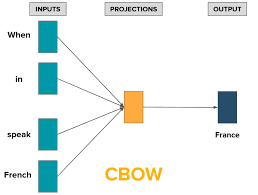
Gambar diatas menunjukkan arsitektur CBOW yang memberikan bobot pada setiap inputan yang dapat 
digunakan untuk memprediksi current word. 

Adapaun langkah- langkah implementasi CBOW pada feature extraction dalam proyek ini adalah sebagai berikut:
* Build the corpus vocabulary
* Build a CBOW (context, target) generator
* Build the CBOW model architecture
* Train the Model
* Get Word Embeddings

### <a id='21'>Build the corpus vocabulary </a>

Kode program dibawah ini adalah tahap membangun korpus sesuai dengan atribut comment_text pada dataset. 
Istilah PAD biasanya digunakan untuk mengaitkan word konteks dengan panjang yang sudah ditetapkan.

In [202]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(data_train_normalized['comment_text'])
word2id = tokenizer.word_index

# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in data_train_normalized['comment_text']]

vocab_size = len(word2id)
embed_size = 100
window_size = 2 # context window size

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 8354
Vocabulary Sample: [('like', 1), ('love', 2), ('video', 3), ('get', 4), ('look', 5), ('peopl', 6), ('fuck', 7), ('make', 8), ('one', 9), ('go', 10)]


### <a id='21'>Build a CBOW (context, target) generator</a>

CBOW membutuhkan pasangan yang terdiri dari Context dan Target. Tahap ini menggunakan windows_size atau ukuran kata yang berada di sekitar
target dan sesuai dengan korpus yang sudah dibangun.

In [203]:
import numpy as np
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)
            
            
# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['duke', 'hahaha', 'cute', 'love'] -> Target (Y): oh
Context (X): ['hahaha', 'oh', 'love', 'look'] -> Target (Y): cute
Context (X): ['oh', 'cute', 'look', 'much'] -> Target (Y): love
Context (X): ['cute', 'love', 'much', 'knee'] -> Target (Y): look
Context (X): ['love', 'look', 'knee', 'boot'] -> Target (Y): much
Context (X): ['look', 'much', 'boot', 'beauti'] -> Target (Y): knee
Context (X): ['know', 'fuck', 'small', 'minor'] -> Target (Y): guy
Context (X): ['fuck', 'guy', 'minor', 'peopl'] -> Target (Y): small
Context (X): ['guy', 'small', 'peopl', 'lame'] -> Target (Y): minor
Context (X): ['small', 'minor', 'lame', 'could'] -> Target (Y): peopl
Context (X): ['minor', 'peopl', 'could', 'make'] -> Target (Y): lame


### <a id='21'>Build the CBOW model architecture</a>

Untuk membangun arsitektur model CBOW, menggunakan word konteks yang akan diinisialisasi dengan bobot acak. 
CBOW kita tidak mempertimbangkan urutan atau urutan dalam word konteks. Kemudian akan di aktivasi oleh fungsi 
softmax pada 
lapisan output, kemudian mencocokkan dengan  target yang sebenarnya.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 4, 100)            835400    
_________________________________________________________________
lambda_6 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 8354)              843754    
Total params: 1,679,154
Trainable params: 1,679,154
Non-trainable params: 0
_________________________________________________________________
None


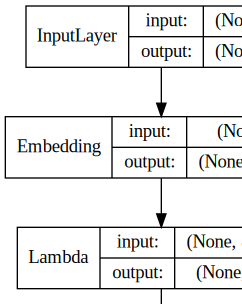

In [204]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

# visualize model structure

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [51]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Instructions for updating:
Use tf.cast instead.
Epoch: 1 	Loss: 405396.5758044049

Epoch: 2 	Loss: 450744.2357540604

Epoch: 3 	Loss: 460122.2181462211

Epoch: 4 	Loss: 471801.8774728191

Epoch: 5 	Loss: 487837.3532274162



### <a id='21'>Get Word Embeddings</a>

Untuk mendapatkan Word Embedding untuk seluruh kosa kata, maka ekstrak  dari lapisan embedding dengan
memanfaatkan kode berikut.

In [205]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(8353, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
love,-0.020557,0.017188,-0.017447,0.048847,-0.048394,0.010212,-0.025232,-0.047507,-0.033703,-0.045065,...,0.008030,-0.049649,0.005060,0.033328,0.003544,-0.043113,0.000290,0.038676,0.017524,0.026069
video,0.034900,-0.020521,0.022767,-0.049148,-0.019022,-0.003310,-0.006478,-0.038355,0.026895,-0.040774,...,0.023838,-0.014659,-0.047330,0.040916,0.022956,0.049653,0.042486,0.019168,-0.012759,0.043214
get,-0.030319,-0.013779,-0.030673,0.004964,0.000743,-0.028057,0.046688,0.036052,0.037380,-0.048934,...,0.008643,0.036659,0.039428,0.011460,-0.022795,0.047671,0.019397,-0.023177,-0.046130,-0.042736
look,0.043032,0.028211,0.043798,0.045865,-0.030048,-0.027308,-0.040720,-0.042607,0.005610,0.040348,...,-0.028041,0.031003,-0.008378,0.040167,0.030907,0.028525,0.042392,-0.017811,-0.034191,0.028646
peopl,0.028457,0.039108,-0.048411,-0.022334,-0.024637,0.049581,0.040073,-0.031305,-0.005184,-0.049372,...,0.045290,0.044581,-0.035854,-0.039993,-0.009559,-0.032852,0.044423,0.010831,-0.043622,-0.028086


In [206]:
review_CBOW = pd.DataFrame(weights, index=list(id2word.values())[1:])

In [207]:
review_CBOW

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
love,-0.020557,0.017188,-0.017447,0.048847,-0.048394,0.010212,-0.025232,-0.047507,-0.033703,-0.045065,...,0.008030,-0.049649,0.005060,0.033328,0.003544,-0.043113,0.000290,0.038676,0.017524,0.026069
video,0.034900,-0.020521,0.022767,-0.049148,-0.019022,-0.003310,-0.006478,-0.038355,0.026895,-0.040774,...,0.023838,-0.014659,-0.047330,0.040916,0.022956,0.049653,0.042486,0.019168,-0.012759,0.043214
get,-0.030319,-0.013779,-0.030673,0.004964,0.000743,-0.028057,0.046688,0.036052,0.037380,-0.048934,...,0.008643,0.036659,0.039428,0.011460,-0.022795,0.047671,0.019397,-0.023177,-0.046130,-0.042736
look,0.043032,0.028211,0.043798,0.045865,-0.030048,-0.027308,-0.040720,-0.042607,0.005610,0.040348,...,-0.028041,0.031003,-0.008378,0.040167,0.030907,0.028525,0.042392,-0.017811,-0.034191,0.028646
peopl,0.028457,0.039108,-0.048411,-0.022334,-0.024637,0.049581,0.040073,-0.031305,-0.005184,-0.049372,...,0.045290,0.044581,-0.035854,-0.039993,-0.009559,-0.032852,0.044423,0.010831,-0.043622,-0.028086
fuck,0.040534,-0.011081,0.041880,-0.043950,-0.026706,-0.011320,0.034701,0.009515,0.023539,0.032231,...,-0.004488,-0.007642,0.005368,-0.007961,-0.025369,0.031040,0.026444,-0.000318,-0.022679,-0.015966
make,-0.038148,-0.019643,0.038511,-0.031190,0.027822,0.031782,0.009515,0.036520,-0.011761,0.046604,...,0.003969,0.040888,-0.001130,0.031594,0.029926,0.040869,-0.010426,0.024771,-0.046062,0.032596
one,-0.023989,-0.004775,-0.013175,-0.006993,-0.038864,-0.041206,0.038417,0.046113,0.022974,-0.021031,...,0.017250,0.035944,0.021350,0.038093,-0.044092,-0.047158,-0.009686,0.002068,0.047175,0.036788
go,-0.032693,-0.019320,0.000527,-0.014266,-0.031777,0.029476,0.038448,0.005641,0.023544,-0.016042,...,-0.020584,-0.005301,0.017801,0.002044,0.020540,0.024373,-0.042771,0.017520,0.033079,-0.030563
know,-0.008334,-0.029784,-0.012159,-0.041184,-0.014212,0.011939,0.020591,-0.011888,0.030388,0.049899,...,0.025021,0.010161,0.041467,-0.009228,0.009887,0.028546,0.030779,-0.006954,-0.023884,-0.004027


In [208]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

(8353, 8353)


In [209]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix_test = euclidean_distances(weights)
print(distance_matrix_test.shape)

(8353, 8353)


In [210]:
from sklearn.feature_extraction.text import CountVectorizer
countVect = CountVectorizer(ngram_range=(1,1))
data_countVect = countVect.fit_transform(data_train_normalized['comment_text']) 

print ("Number of comments, number of terms : ", data_countVect.shape)

Number of comments, number of terms :  (4742, 8331)


In [211]:
data_countVect.shape

(4742, 8331)

In [212]:
print ("{} sentences and {} unique words create a matrix of the shape {}.".format(
    len(data_train_normalized['comment_text']),
    len(countVect.get_feature_names()),
    data_countVect.toarray().shape
))
#Create the bag of words matrix
data_countVect_BoW = data_countVect.toarray()
data_countVect_BoW

4742 sentences and 8331 unique words create a matrix of the shape (4742, 8331).


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Split Data

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_train_normalized['comment_text'], data_train_normalized['sentimen'], test_size=0.2, random_state=0)

In [258]:
print ('Showing the list of data labels...')
sentiment_list = list(y_train.value_counts().index)
sentiment_list

Showing the list of data labels...


[1.0, -1.0, 0.0]

In [259]:
X_train_countVect=countVect.fit_transform(X_train)

In [260]:
X_val_countVect=countVect.transform(X_val)

In [263]:
negatif=len([x for x in y_train if x == -1.0])
positif=len([x for x in y_train if x == 1.0])
netral=len([x for x in y_train if x == 0.0])
negatif, positif, netral

(1264, 1271, 1258)

In [264]:
negatif=len([x for x in y_val if x == -1.0])
positif=len([x for x in y_val if x == 1.0])
netral=len([x for x in y_val if x == 0.0])
negatif, positif, netral

(340, 325, 284)

### Model Construction

In [265]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=1).fit(X_train_countVect, y_train)
svc_predictions = svc.predict(X_train_countVect)
svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [266]:
svc = SVC(kernel='linear',C=1).fit(X_train_countVect, y_train)
svc_predictions1 = svc.predict(X_val_countVect)

In [267]:
svc.predict(X_val_countVect)

array([-1.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  1.,  1.,  1.,  0., -1.,
       -1.,  0., -1.,  1., -1., -1.,  1., -1.,  0.,  0.,  0.,  0., -1.,
        1.,  0.,  1.,  0.,  0., -1.,  1.,  1., -1.,  1., -1.,  1.,  0.,
        1., -1.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  0.,  0., -1., -1.,  0., -1.,  0.,  0., -1., -1., -1.,  0.,
        1.,  0., -1., -1.,  1., -1., -1.,  0., -1.,  0.,  0., -1.,  1.,
        1.,  0., -1., -1., -1.,  1., -1., -1., -1.,  1.,  0., -1.,  0.,
       -1., -1.,  1.,  1.,  1.,  0.,  0.,  1.,  1., -1.,  0.,  1.,  0.,
        0., -1.,  1.,  0.,  1., -1.,  0., -1.,  1.,  0.,  0.,  1., -1.,
        0., -1., -1., -1.,  0.,  0.,  0.,  1., -1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0., -1.,
        1.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  1., -1.,  1.,  0.,  1.,
        0.,  1., -1.,  0.,  0.,  0., -1., -1.,  0., -1.,  0., -1.,  0.,
        0.,  1.,  0.,  1.,  0., -1., -1.,  1.,  0., -1., -1., -1

In [247]:
X_val_countVect=countVect.transform(X_val)

In [221]:
review_CBOW = pd.DataFrame(weights, index=list(id2word.values())[1:])

### Save Model

In [222]:
pickle.dump(svc, open('svc_sentimen_model1.pkl','wb'))

In [223]:
# Print model evaluation to predicted result
def modelEvaluation(predictions):
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_val, predictions)))
    print ("\nClassification report : \n", metrics.classification_report(y_val, predictions))
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_val, predictions))

In [224]:
modelEvaluation(svc_predictions1)


Accuracy on validation set: 0.8051

Classification report : 
               precision    recall  f1-score   support

        -1.0       0.84      0.74      0.79       340
         0.0       0.74      0.90      0.82       284
         1.0       0.84      0.78      0.81       325

   micro avg       0.81      0.81      0.81       949
   macro avg       0.81      0.81      0.81       949
weighted avg       0.81      0.81      0.80       949


Confusion Matrix : 
 [[253  52  35]
 [ 13 256  15]
 [ 34  36 255]]
